<a href="https://colab.research.google.com/github/Soumik229/portfolio/blob/main/Renewable_Energy_%26_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name : Renewable Energy Potential Mapping & Forecasting**

Project type - Exploratory Data Analysis (EDA), Regression and Time Series Forecasting .

Contribution - **Soumik Kuila & Nitai Das**

---



# **Project Summery**
This project contain 2500 rows and 56 columns aims to analyze the provided renewable energy dataset, which integrates meteorological data (temperature, humidity, wind speed, solar radiation, etc.) and spatial data (latitude, longitude, and regional characteristics), to identify high-potential zones for renewable energy deployment.

By leveraging advanced machine learning techniques the project will forecast future energy generation potential, evaluate resource availability and provide data-driven insights for sustainable energy planning. This project not only contributes to optimizing renewable energy production but also supports policymakers, industries, and communities in achieving cleaner energy transitions.

The analysis will involve Exploratory Data Analysis (EDA) to understand correlations between weather patterns and energy generation, regression modeling to estimate renewable power output and time series forecasting to predict future energy availability. Additionally, geospatial mapping techniques will be employed to visualize renewable energy hotspots and potential expansion areas.

**The outcomes of the project will include:**

- Identification of regions with the highest renewable energy potential.
- Forecasts of renewable energy generation over different time horizons.
- Data-driven visualizations to assist policymakers, industries, and stakeholders in making informed decisions.

# Problem Statement :
As the world needs more energy and less carbon pollution, we must shift to renewable sources. But renewable energy depends on factors like sunlight, wind, and temperature, which change a lot from place to place.

**The key challenges include:**

1.   **Identifying optimal locations** for renewable energy plants based on available natural resources.
2.   **Forecasting future energy generation potential** considering weather variability and climate change.
3.   **Providing actionable insights** for policymakers and industries to maximize energy efficiency and sustainability.

Thus, the project addresses the problem of how to forecast renewable energy potential to enable smarter investments, planning and adoption of clean energy solutions.

# **EDA Parts**
- EDA is like getting to know our data before applying machine learning or statistical models.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### **Upload the CSV Dataset into the drive**







In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import io
data = pd.read_csv("/content/drive/MyDrive/Dataset/complete_renewable_energy_dataset.csv")

### **Head**
By this we can print the Head part of the dataset that print the top most 5 rows.

In [ ]:
data.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


### **Tail**
By this we can print the tail part of the dataset that print the last 5 rows.

In [ ]:
data.tail()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
2495,Japan,2023,Solar,40091.199325,46650.085012,5.589553e+09,819897975,1.110048e+14,574873.698448,57322.038062,...,57.159094,48.878098,60.276930,890,25,9992,883698,29.420472,1,0
2496,Australia,2017,Hydro,9454.189177,28506.752159,5.602669e+09,116522920,1.433965e+14,741594.182522,56635.966737,...,68.969915,85.799679,39.248237,898,77,6484,447626,73.280184,1,1
2497,India,2022,Geothermal,94329.590380,22757.496947,8.590460e+09,1409070574,5.582925e+13,922633.984945,85455.105274,...,32.759424,1.049568,51.281761,602,49,3535,535996,25.217499,0,1
2498,China,2000,Biomass,66206.311515,3530.005331,5.640793e+09,859850706,2.147667e+13,481213.409793,44933.818979,...,60.303422,29.261717,17.238731,520,46,249,21322,7.992712,1,0
2499,France,2010,Hydro,13035.595344,22890.620016,2.736650e+09,436771140,1.300406e+14,673214.512869,25024.616078,...,95.233329,17.336201,26.427988,245,18,389,493060,91.532474,0,0


### **Shape**
By the **.shape()** method we can know about the total number of rows and columns.

In [ ]:
# Checking the shape of our data
data.shape

(2500, 56)

### **Information**
Some information about the dataset with their datatypes.

In [ ]:
#basic informatin about dataset and
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  2500 non-null   object 
 1   Year                                     2500 non-null   int64  
 2   Energy Type                              2500 non-null   object 
 3   Production (GWh)                         2500 non-null   float64
 4   Installed Capacity (MW)                  2500 non-null   float64
 5   Investments (USD)                        2500 non-null   float64
 6   Population                               2500 non-null   int64  
 7   GDP                                      2500 non-null   float64
 8   Energy Consumption                       2500 non-null   float64
 9   Energy Exports                           2500 non-null   float64
 10  Energy Imports                           2500 no

### **Describe**
Describe the database in a table form.

In [ ]:
# Describe the dataset
data.describe()

,Year,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,Energy Imports,CO2 Emissions,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
count,2500.000000,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000
mean,2011.437600,48743.195073,24882.910674,4.956155e+09,7.458927e+08,1.010745e+14,495701.245158,50143.392627,50800.373871,491218.412643,...,50.736720,48.442085,50.280019,496.660400,50.431200,4978.93360,502040.891200,49.749110,0.512000,0.473600
std,6.895471,28340.915147,14463.459958,2.894789e+09,4.373146e+08,5.782363e+13,291419.017957,28833.333066,28740.851763,289783.733338,...,28.623766,28.798216,28.719483,296.181011,28.877168,2881.93256,293084.636148,28.924307,0.499956,0.499402
min,2000.000000,1053.354158,114.531639,5.886994e+06,1.255357e+06,5.603965e+10,1264.851083,1036.618008,1057.783513,1124.768458,...,0.104915,0.025281,0.025733,0.000000,0.000000,3.00000,494.000000,0.033829,0.000000,0.000000
25%,2006.000000,24309.656479,12282.213159,2.473145e+09,3.720811e+08,5.049265e+13,237300.546551,25146.745295,26347.461047,242894.720511,...,26.241437,23.519814,25.934406,234.000000,26.000000,2532.00000,244438.000000,23.968451,0.000000,0.000000
50%,2011.000000,47367.117600,24689.162460,4.961772e+09,7.515190e+08,1.027006e+14,496118.165272,49706.656938,50698.800022,475721.007886,...,50.850766,48.127673,51.398964,493.000000,51.000000,4992.50000,499151.000000,50.232069,1.000000,0.000000
75%,2017.250000,73079.452832,37438.443570,7.418384e+09,1.118019e+09,1.519604e+14,753779.282813,75567.191515,75807.642495,747649.446362,...,74.908485,73.324825,74.724073,755.000000,76.000000,7465.00000,765088.000000,74.354781,1.000000,1.000000
max,2023.000000,99937.503719,49997.387577,9.998292e+09,1.499494e+09,1.999223e+14,999618.512172,99952.509817,99912.213813,999816.500175,...,99.970526,99.901347,99.998838,999.000000,99.000000,9999.00000,999226.000000,99.988355,1.000000,1.000000


### **Check Null Values**
Here we are checking the total null values in each column.
If the column had a null value then it return **True** and if there are a value in the column so that is not null for this it always return **False**.

And the total percentage of available of Null values in each column.

In [ ]:
# Checking the total null values in each column in the dataset
data.isnull()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Percentage of null values in each column
print(100*(data.isnull().sum()/len(data.index)).sort_values(ascending=False))

Country                                    0.0
Year                                       0.0
Energy Type                                0.0
Production (GWh)                           0.0
Installed Capacity (MW)                    0.0
Investments (USD)                          0.0
Population                                 0.0
GDP                                        0.0
Energy Consumption                         0.0
Energy Exports                             0.0
Energy Imports                             0.0
CO2 Emissions                              0.0
Renewable Energy Jobs                      0.0
Government Policies                        0.0
R&D Expenditure                            0.0
Renewable Energy Targets                   0.0
Average Annual Temperature                 0.0
Annual Rainfall                            0.0
Solar Irradiance                           0.0
Wind Speed                                 0.0
Hydro Potential                            0.0
Geothermal Po

### **Data Type**
By the use of **.dtypes** we get all the data types of each columns.

In [ ]:
data.dtypes

,0
Country,object
Year,int64
Energy Type,object
Production (GWh),float64
Installed Capacity (MW),float64
Investments (USD),float64
Population,int64
GDP,float64
Energy Consumption,float64
Energy Exports,float64


### **Copy**
By the use of **.copy()** we are able to create duplicate dataframe.

In [ ]:
# Creat a copy of dataset before handling null values
df = data.copy()
df

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Japan,2023,Solar,40091.199325,46650.085012,5.589553e+09,819897975,1.110048e+14,574873.698448,57322.038062,...,57.159094,48.878098,60.276930,890,25,9992,883698,29.420472,1,0
2496,Australia,2017,Hydro,9454.189177,28506.752159,5.602669e+09,116522920,1.433965e+14,741594.182522,56635.966737,...,68.969915,85.799679,39.248237,898,77,6484,447626,73.280184,1,1
2497,India,2022,Geothermal,94329.590380,22757.496947,8.590460e+09,1409070574,5.582925e+13,922633.984945,85455.105274,...,32.759424,1.049568,51.281761,602,49,3535,535996,25.217499,0,1
2498,China,2000,Biomass,66206.311515,3530.005331,5.640793e+09,859850706,2.147667e+13,481213.409793,44933.818979,...,60.303422,29.261717,17.238731,520,46,249,21322,7.992712,1,0


### **Print columns**
By the use of list(data.columns) we are find the all columns.

In [ ]:
#columns of dataset
list(data.columns)

['Country',
 'Year',
 'Energy Type',
 'Production (GWh)',
 'Installed Capacity (MW)',
 'Investments (USD)',
 'Population',
 'GDP',
 'Energy Consumption',
 'Energy Exports',
 'Energy Imports',
 'CO2 Emissions',
 'Renewable Energy Jobs',
 'Government Policies',
 'R&D Expenditure',
 'Renewable Energy Targets',
 'Average Annual Temperature',
 'Annual Rainfall',
 'Solar Irradiance',
 'Wind Speed',
 'Hydro Potential',
 'Geothermal Potential',
 'Biomass Availability',
 'Energy Storage Capacity',
 'Grid Integration Capability',
 'Electricity Prices',
 'Energy Subsidies',
 'International Aid for Renewables',
 'Public Awareness',
 'Energy Efficiency Programs',
 'Urbanization Rate',
 'Industrialization Rate',
 'Energy Market Liberalization',
 'Renewable Energy Patents',
 'Educational Level',
 'Technology Transfer Agreements',
 'Renewable Energy Education Programs',
 'Local Manufacturing Capacity',
 'Import Tariffs on Energy Equipment',
 'Export Incentives for Energy Equipment',
 'Natural Disaster

### **Exploring some Columns**
For this we can uniquely identify the objects of the specified column by **unique**().
and we also done the value count of a specefic column by **value_count**().

In [ ]:
# Unique Name of the Country
data['Country'].unique()

array(['USA', 'Australia', 'Canada', 'Japan', 'China', 'India', 'Germany',
       'France', 'Brazil', 'Russia'], dtype=object)

In [ ]:
data['Year'].value_counts()

,count
Year,
2010,130
2016,124
2014,121
2018,120
2006,119
2007,119
2008,117
2002,113
2011,110


### **Check Duplicate**
By the use of **.duplicate()** method we can check the presence of the duplicate value in our dataset.

In [ ]:
#duplicacy checking
len(data[data.duplicated()])

0

### **Sample**
By the use of  **.sample(10)**  we can get rendom 10 rows.
If we run the cell twice then we get also another rendom rows.

In [ ]:
# Random 10 rows
data.sample(10)

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
2026,Canada,2007,Solar,28571.582004,49317.507181,2.839124e+09,837504424,1.248696e+14,16551.098990,27774.333278,...,46.365789,53.364009,33.601480,235,2,6323,973171,31.662472,1,0
2345,Russia,2020,Geothermal,23273.667322,15932.437157,3.723978e+09,342252484,1.527892e+14,261298.774917,86757.658395,...,2.777086,77.545675,93.771112,134,86,8130,481841,39.190323,1,0
1676,Brazil,2017,Solar,26692.336431,15439.168794,5.621561e+09,1012924343,1.139495e+14,744542.184326,1397.736999,...,94.112129,21.709706,28.190529,24,27,2827,825161,10.522245,0,1
1841,Japan,2007,Biomass,73986.683565,26746.751004,7.437572e+08,1271831808,1.393643e+14,440792.503203,19869.850799,...,52.803704,35.719821,58.342752,16,11,8840,536611,85.463186,0,1
1259,Japan,2014,Solar,71365.153520,13164.789062,8.992019e+09,121019379,7.664960e+13,69943.015599,69292.403596,...,48.423416,95.144263,70.522512,55,77,635,251645,38.911543,0,0
2078,Brazil,2022,Solar,30712.440225,29702.989106,6.072266e+09,400105361,7.909617e+13,168314.641743,17980.137012,...,59.925977,35.699074,94.311958,24,9,6636,382766,9.167806,0,0
2315,France,2007,Solar,26548.600364,47561.917723,5.931338e+09,805517886,6.533943e+13,188448.964743,21496.345091,...,79.300378,76.159728,89.857211,502,78,3560,760800,46.539963,1,1
1849,Russia,2001,Wind,51655.025427,26849.805643,5.956493e+09,274949120,1.838702e+14,760338.803104,90820.445990,...,21.008389,83.501011,34.557006,350,40,822,45930,17.238578,0,0
1970,China,2004,Geothermal,75290.866700,28350.490838,6.903991e+08,826496354,9.950753e+13,401972.362852,40149.023257,...,62.087711,80.015666,60.552472,184,9,2726,55676,5.071648,1,1
298,Germany,2000,Biomass,92070.539575,24065.193917,5.523800e+09,1189305347,1.931555e+14,241523.752779,52528.718251,...,58.117595,24.199875,75.785086,723,61,3246,973076,59.823147,1,1


### **Rename**
By the use of **.rename** we can rename the columns Name how much we need.

In [ ]:
data.rename(columns = {'Country':'Country_Name', 'Production (GWh)': 'Production_Rate'},inplace = False)

,Country_Name,Year,Energy Type,Production_Rate,Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Japan,2023,Solar,40091.199325,46650.085012,5.589553e+09,819897975,1.110048e+14,574873.698448,57322.038062,...,57.159094,48.878098,60.276930,890,25,9992,883698,29.420472,1,0
2496,Australia,2017,Hydro,9454.189177,28506.752159,5.602669e+09,116522920,1.433965e+14,741594.182522,56635.966737,...,68.969915,85.799679,39.248237,898,77,6484,447626,73.280184,1,1
2497,India,2022,Geothermal,94329.590380,22757.496947,8.590460e+09,1409070574,5.582925e+13,922633.984945,85455.105274,...,32.759424,1.049568,51.281761,602,49,3535,535996,25.217499,0,1
2498,China,2000,Biomass,66206.311515,3530.005331,5.640793e+09,859850706,2.147667e+13,481213.409793,44933.818979,...,60.303422,29.261717,17.238731,520,46,249,21322,7.992712,1,0


### **HeatMap**
Here are the heatmap of the first 10 numeric columns to show correlations between variables. It uses colors and values to highlight positive and negative relationships, making it easy to see which features are strongly related.

In [ ]:
# HeatMap
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Get the first 10 numericle columns
selected_cols = numeric_df.iloc[:, :10]

# Compute correlation matrix
corr_matrix = selected_cols.corr()

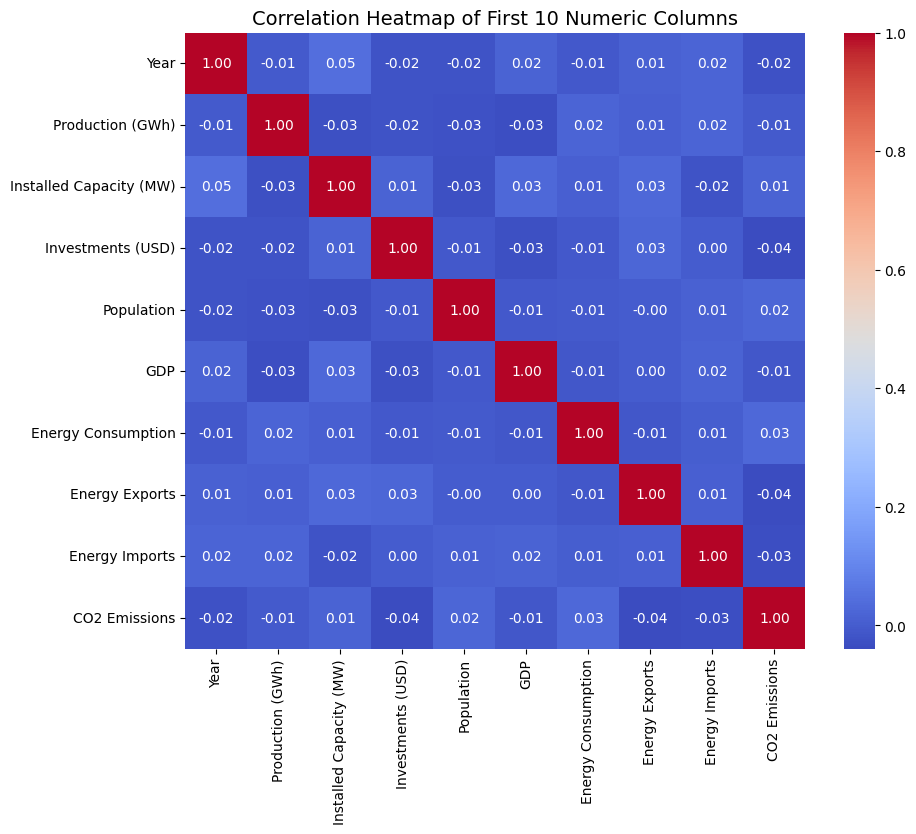

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of First 10 Numeric Columns", fontsize=14)
plt.show()

### **Count**

Counting the total electricity price for all the countries from **Country** and **Electricity Prices** columns in the dataset.

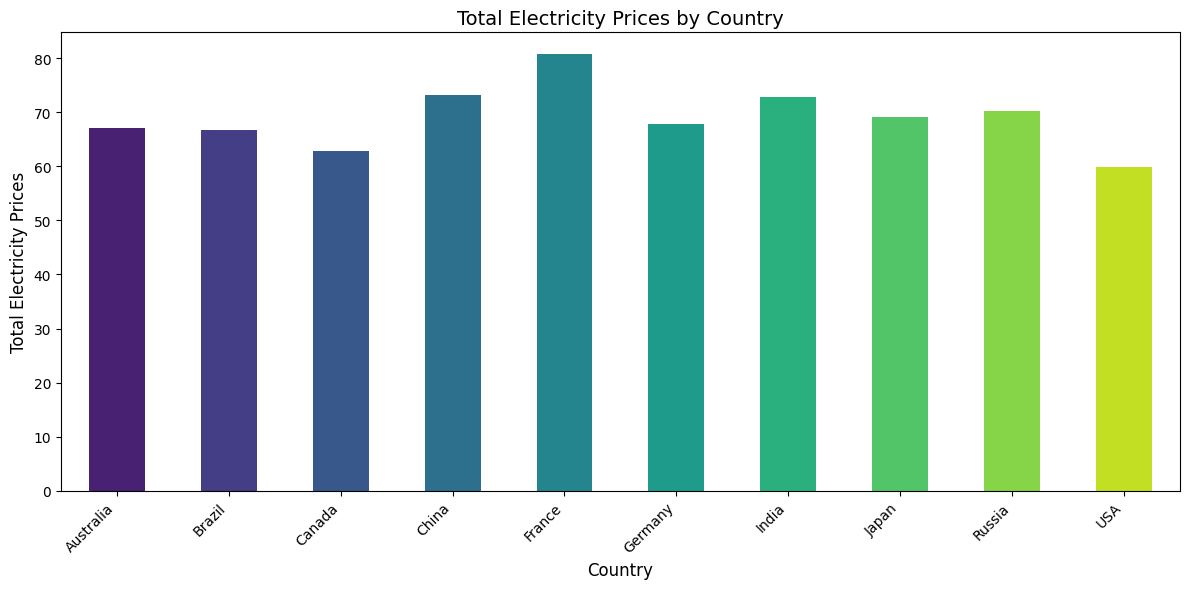

In [ ]:
Total_Price = data.groupby('Country')['Electricity Prices'].sum()
plt.figure(figsize=(12, 6))
Total_Price.plot(kind='bar',color=sns.color_palette('viridis', len(Total_Price)))
plt.title("Total Electricity Prices by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Electricity Prices", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Histogram**
By ploting the Histogram with KDE plot we ware able to know about the total distribution of Electricity Price with the Frequency.

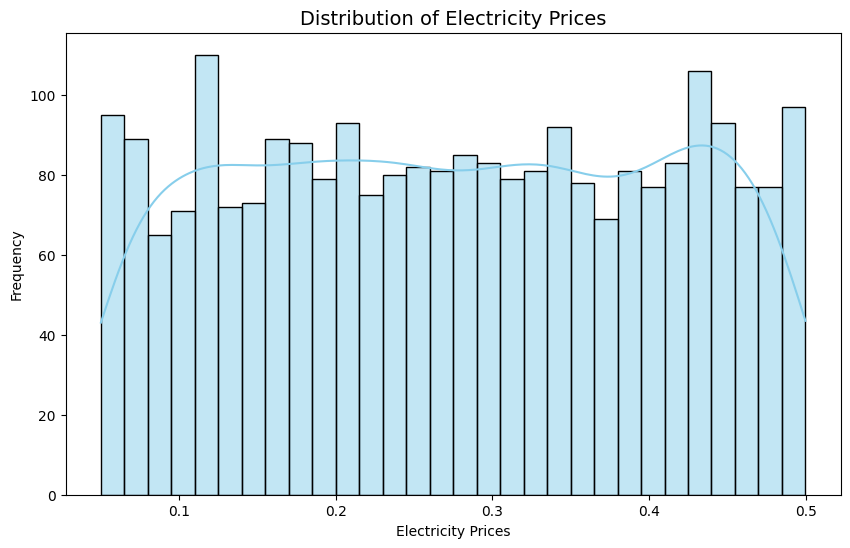

In [ ]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(data['Electricity Prices'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Electricity Prices", fontsize=14)
plt.xlabel("Electricity Prices")
plt.ylabel("Frequency")
plt.show()

### **Box plot**
By implementing the Box plot we understand the Electricity Prices for all of the Country.

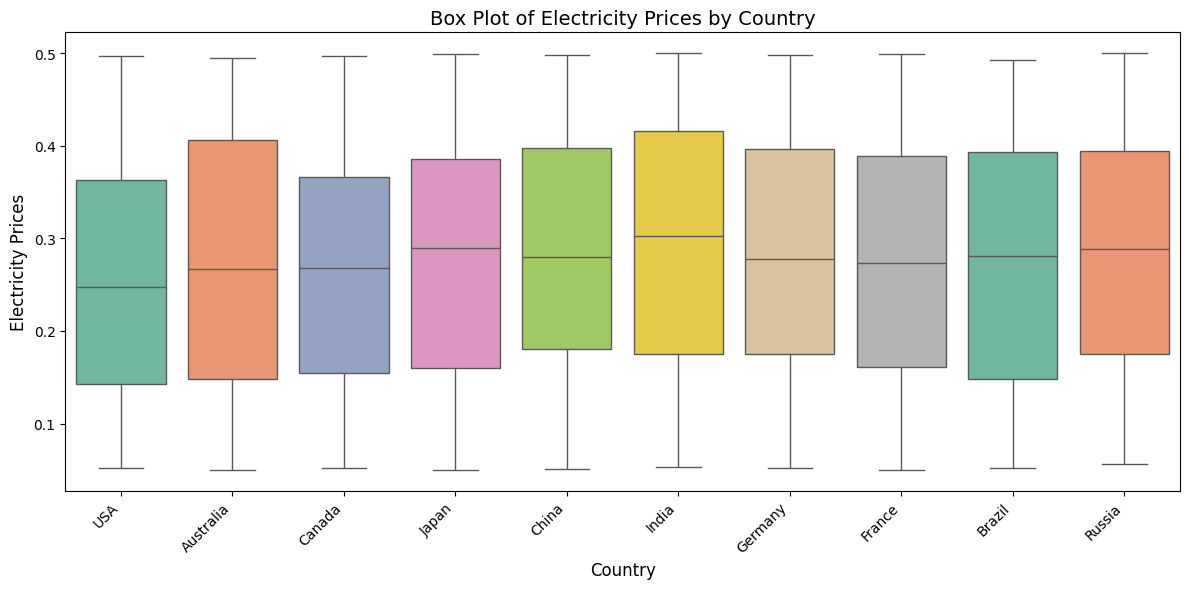

In [ ]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Electricity Prices', data=data,hue='Country', palette='Set2')
plt.title("Box Plot of Electricity Prices by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Electricity Prices", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Violin Plot**
From this we are trying to ploting the Solar Irradiance and Electricity Prices for the all countries uniquely by the Violin plot.   

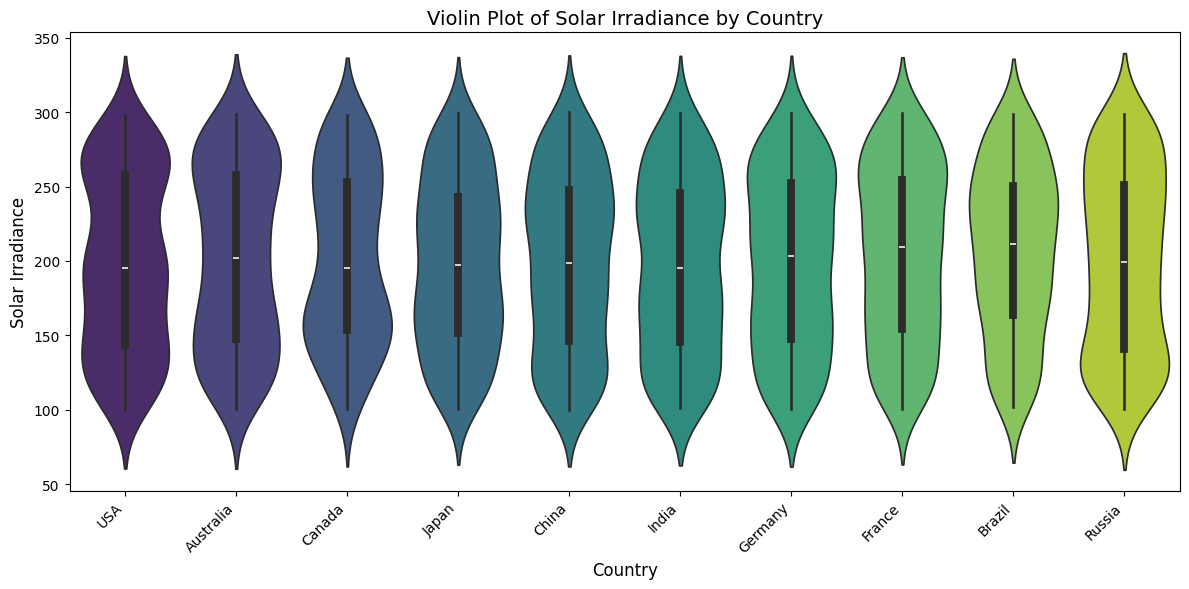

In [ ]:
# Violin Plot based on Solar Irradiance
plt.figure(figsize=(12, 6))
sns.violinplot(x='Country', y='Solar Irradiance', data=data,hue='Country', palette='viridis')
plt.title("Violin Plot of Solar Irradiance by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Solar Irradiance", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

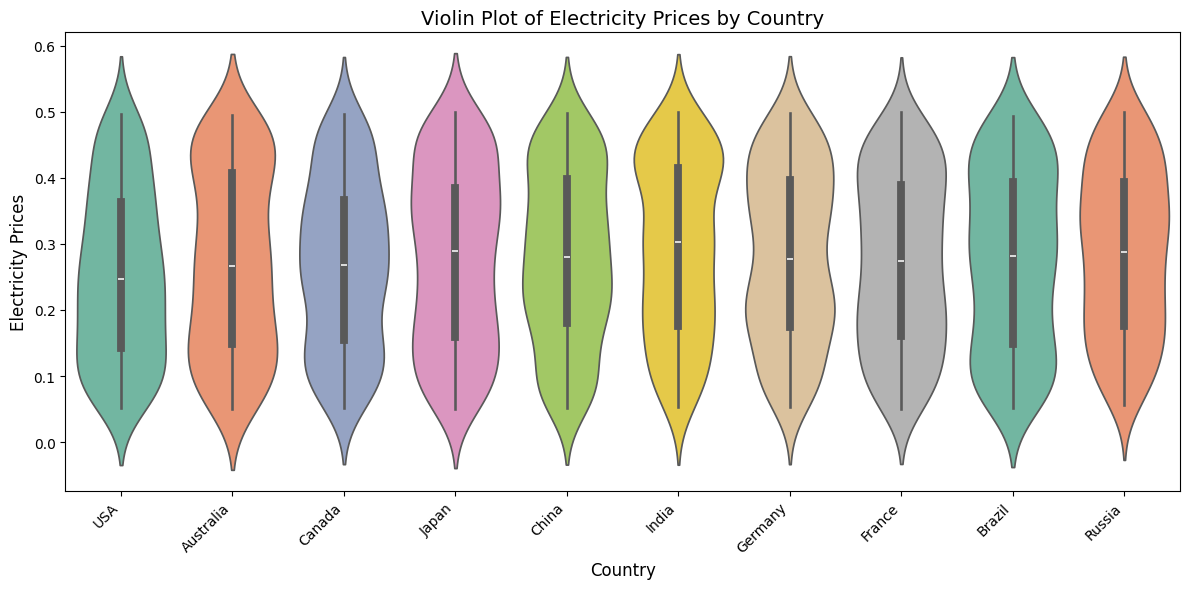

In [ ]:
# Violin Plot based on Electricity Prices
plt.figure(figsize=(12, 6))
sns.violinplot(x='Country', y='Electricity Prices', data=data, hue='Country', palette='Set2')
plt.title("Violin Plot of Electricity Prices by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Electricity Prices", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Count Plot**
By the use of the Count plot we are able to define the plotting the total count of each Energy Types.  

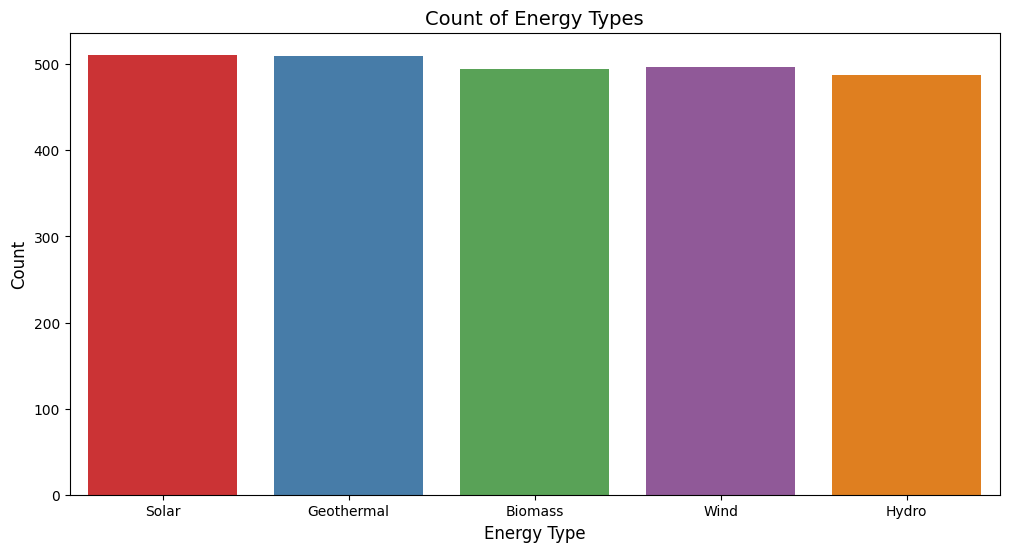

In [ ]:
# Count Plot based on Energy Type
plt.figure(figsize=(12,6))
sns.countplot(x='Energy Type', data=data,hue='Energy Type', palette='Set1')
plt.title("Count of Energy Types", fontsize=14)
plt.xlabel("Energy Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


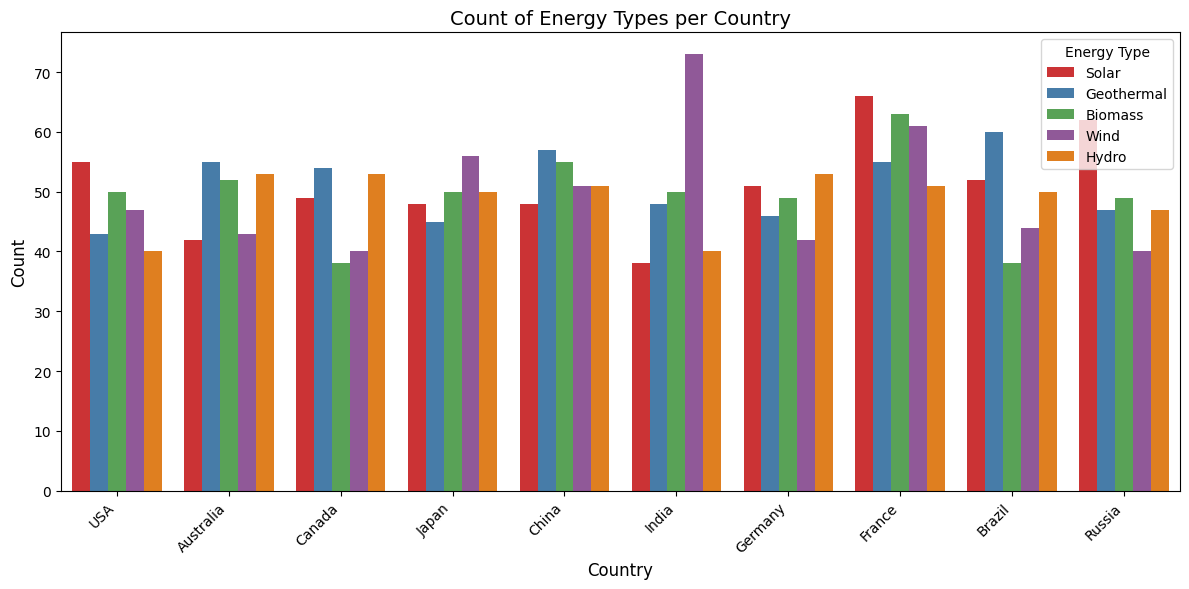

In [ ]:
# Count Plot based on the comparison into Energy Type and Country
plt.figure(figsize=(12,6))
sns.countplot(x='Country', hue='Energy Type', data=data, palette='Set1')
plt.title("Count of Energy Types per Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **Pie Chart**
By the EDA plotting we are able to undersatnd the record count of top 5 countries.

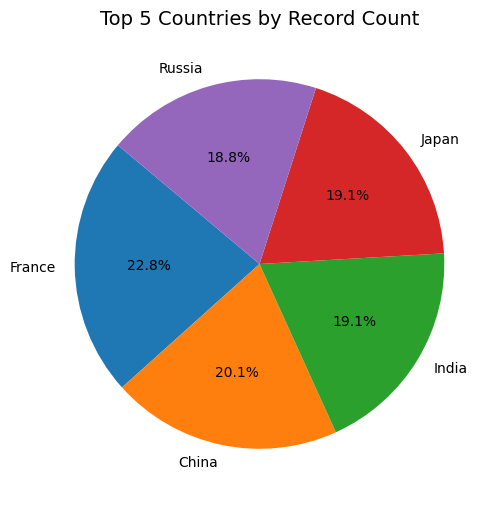

In [ ]:
# Pie Charts Top 5 country
top5 = data['Country'].value_counts().head(5)
plt.figure(figsize=(6,6))
plt.pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title("Top 5 Countries by Record Count", fontsize=14)
plt.show()

### **Donut Chart**
By using the Donut chart ploting we get the total counts of each Energy Types.

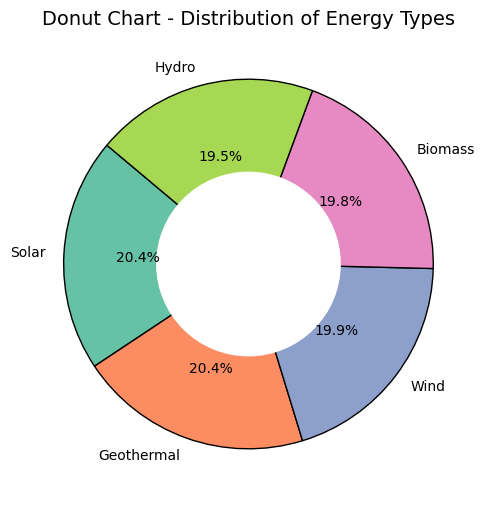

In [ ]:
# Donut Charts
energy_counts = data['Energy Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(energy_counts, labels=energy_counts.index, autopct='%1.1f%%',startangle=140, colors=plt.cm.Set2.colors, wedgeprops={'edgecolor':'black'})

# Draw circle for donut
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Donut Chart - Distribution of Energy Types", fontsize=14)
plt.show()

# **Regression Part**

Regression is a supervised machine learning technique used to predict a continuous value (numeric output).

Example with our dataset:
- Predicting Renewable Energy Production (GWh) from Installed Capacity, Investments, Climate conditions, Policies etc.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

###**Spliting Training and Testing Set**


In [9]:
# Independent  variable
X = data[[
    "Installed Capacity (MW)", "Investments (USD)",
    "Solar Irradiance", "Wind Speed", "Hydro Potential",
    "GDP", "Energy Consumption", "CO2 Emissions"
]]
# Dependent  variable
y = data["Production (GWh)"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Check the shape of train and test datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape : {y_test.shape}")


X_train shape: (2000, 8)
X_test shape : (500, 8)
y_train shape: (2000,)
y_test shape : (500,)


In [ ]:
X_train[0:10]

,Installed Capacity (MW),Investments (USD),Solar Irradiance,Wind Speed,Hydro Potential,GDP,Energy Consumption,CO2 Emissions
2055,36383.992104,9.875497e+09,279.802651,3.964907,19.916673,3.846763e+12,543061.673463,222984.989762
1961,3035.543577,2.624065e+09,195.068164,8.457538,84.213827,1.251753e+14,745300.635050,126052.292665
1864,20949.941668,2.340721e+09,166.669663,5.299610,48.074938,4.147456e+13,430017.806480,706963.423276
2326,13903.277860,6.634839e+09,117.554451,7.397869,39.869036,1.750674e+13,393841.049978,366404.868084
461,40010.089678,8.504689e+08,122.624779,3.344423,52.833070,1.839815e+14,857949.142933,908886.664295
109,28881.675657,6.173726e+08,194.317149,5.177819,19.266757,3.216976e+13,817225.028941,244650.998342
1962,42958.814293,1.631609e+09,196.591117,5.334857,89.692960,1.375293e+14,81217.367858,882493.076587
354,31311.519200,2.174339e+09,240.789459,6.269446,75.046350,7.009566e+13,794551.349443,733067.678506
266,6171.975473,2.461206e+08,186.245516,8.878281,16.991302,1.278693e+14,992224.976821,99777.843912
1545,32732.963046,3.498935e+09,282.158816,8.180299,43.419213,9.400197e+13,799920.803048,1124.768458


In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

2000
2000
500
500


###**Linear Regression**

In machine learning, linear regression is a supervised learning algorithm that models the relationship between a dependent variable (the target) and one or more independent variables (features) by finding a linear equation that best fits the data.


In [ ]:
def predict(ml_model,x,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    rob =RobustScaler()

    x_train = rob.fit_transform(X_train)
    x_test = rob.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(f'R^2 is {model.score(x_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n MSE is: {mse}\n RMSE is: {rmse}')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


R^2 is -0.004417046013192927
 Adj R^2 is -0.011877717187350312
 MSE is: 872456654.7134707
 RMSE is: 29537.377248385998


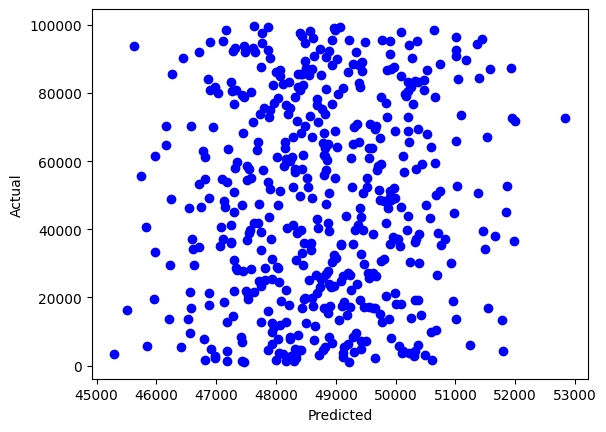

In [ ]:
lin_model = predict(LinearRegression(), X, y)

In [ ]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(" Linear Regression Results:")
print("R² Score:", r2)
print("Adjusted R²:", adj_r2)
print("RMSE:", rmse)
print("MAE:", mae)


 Linear Regression Results:
R² Score: -0.03209650988885637
Adjusted R²: -0.04891274630252407
RMSE: 28943.791145678795
MAE: 24998.06668238041


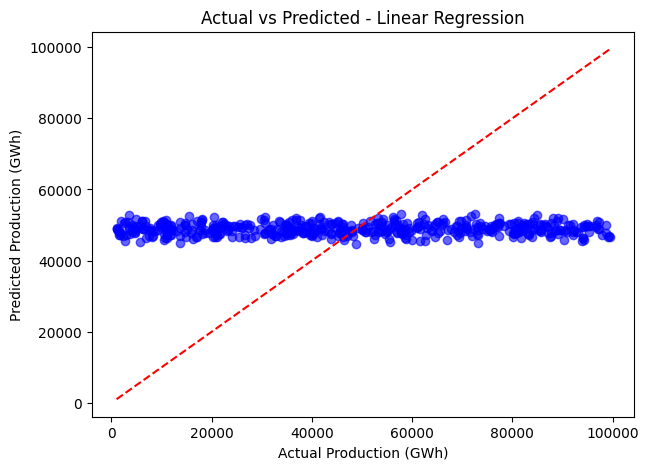

In [ ]:
# Visualization
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Production (GWh)")
plt.ylabel("Predicted Production (GWh)")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

###**Decision Tree**
Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [10]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42, max_depth=6)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


R^2 is -1.202919412720866
 Adj R^2 is -1.0724207545913953
 MSE is: 1786873302.9673033
 RMSE is: 42271.42418901099


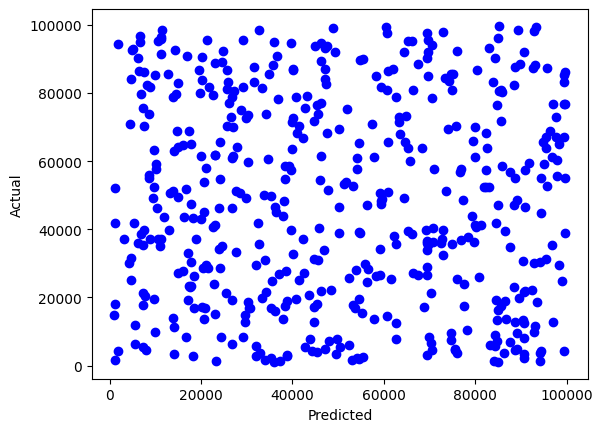

In [ ]:
predict(DecisionTreeRegressor(),X,y)

In [ ]:
y_pred_tree = tree_model.predict(X_test)

In [ ]:
# Evaluation
mse = mean_squared_error(y_test, y_pred_tree)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)

In [ ]:
print("Decision Tree Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

Decision Tree Performance:
MAE: 23882.37044709094
RMSE: 28537.62602694469
R² Score: -0.08825233618957062


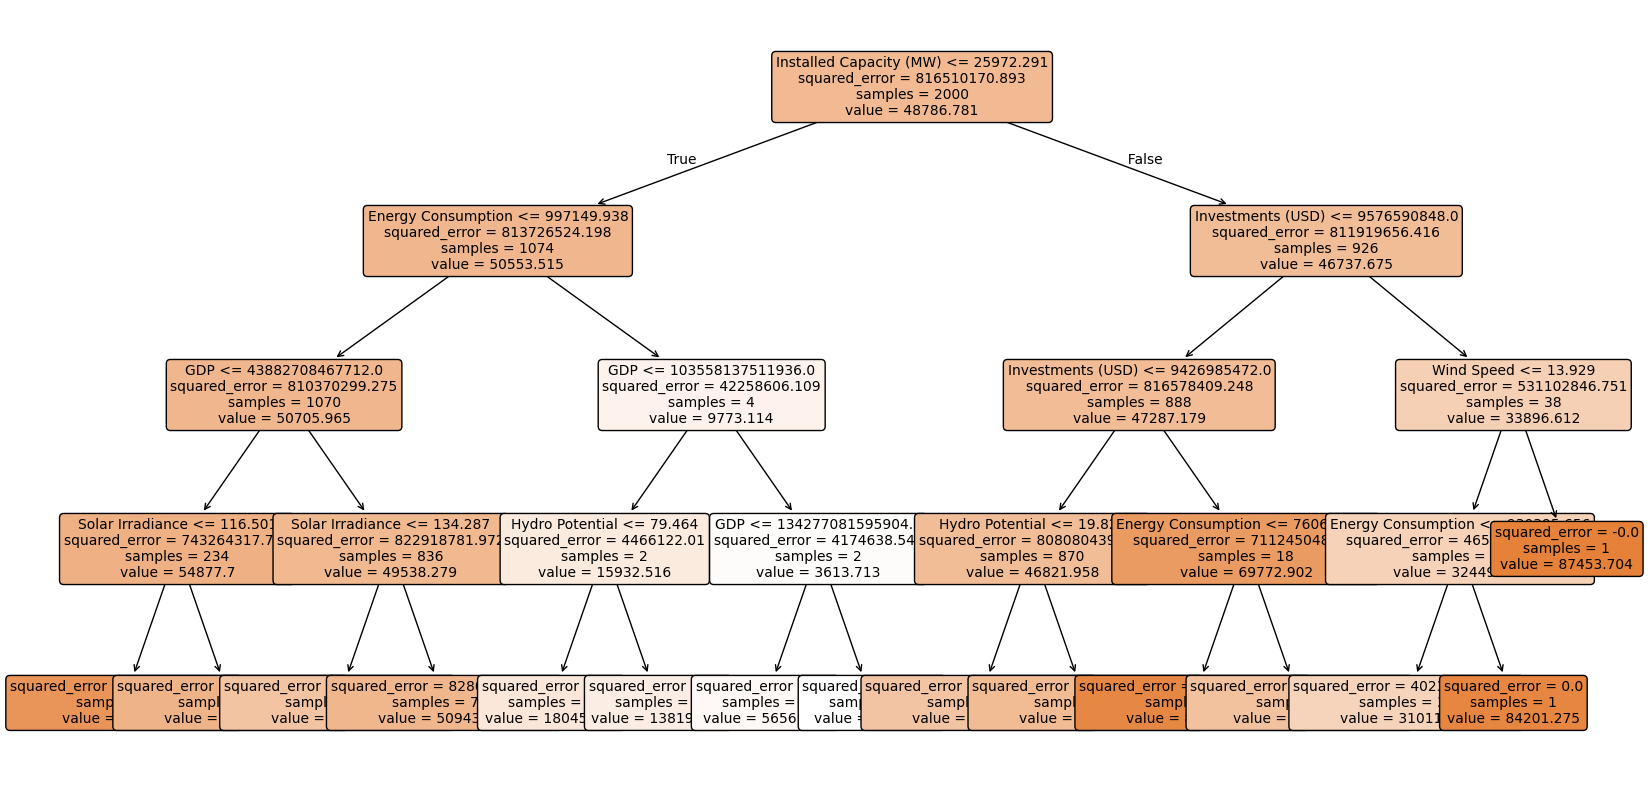

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

### **Forecasting**
Forecasting = predicting future values of a variable based on its historical trends.
Example:

- Predicting Renewable Energy Production (GWh) for the next 10 years.
- Forecasting CO₂ Emissions for each country.
- Estimating Investments in Renewables in future.

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Filter data for one country (example: USA, Solar)
country_data = data[(data["Country"] == "USA") & (data["Energy Type"] == "Solar")]

In [ ]:
ts = country_data[["Year", "Production (GWh)"]].set_index("Year")

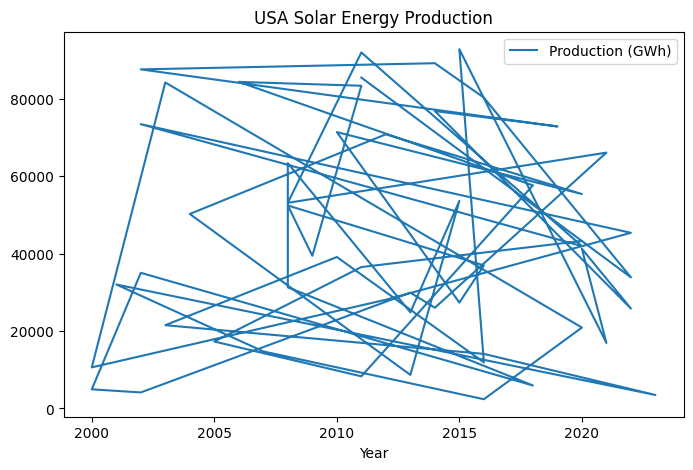

In [ ]:
ts.plot(figsize=(8,5), title="USA Solar Energy Production")
plt.show()

**ARIMA**

ARIMA stands for Autoregressive Integrated Moving Average. It is a statistical method used for time series analysis and forecasting.

In [ ]:
model = ARIMA(ts, order=(2,1,2))
model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
forecast = model_fit.forecast(steps=10)
print(forecast)

55    38053.372809
56    44956.532784
57    38888.926067
58    45165.205709
59    39105.186910
60    45124.632969
61    39215.659172
62    45044.638428
63    39306.242652
64    44960.227722
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### **Random Forest**
In machine learning, a Random Forest is an ensemble learning method that constructs a "forest" of multiple decision trees during training and outputs the mode of the classes (for classification problems) or the mean prediction (for regression problems) of the individual trees.

In [ ]:
# Create model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=0,
    max_depth=None,
    n_jobs=-1
)

# Train model
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=0)

In [ ]:
# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Performance:")
print(f"  MSE  = {mse:.2f}")
print(f"  RMSE = {rmse:.2f}")
print(f"  MAE  = {mae:.2f}")
print(f"  R²   = {r2:.4f}")


Random Forest Performance:
  MSE  = 787047630.41
  RMSE = 28054.37
  MAE  = 23866.42
  R²   = -0.0517


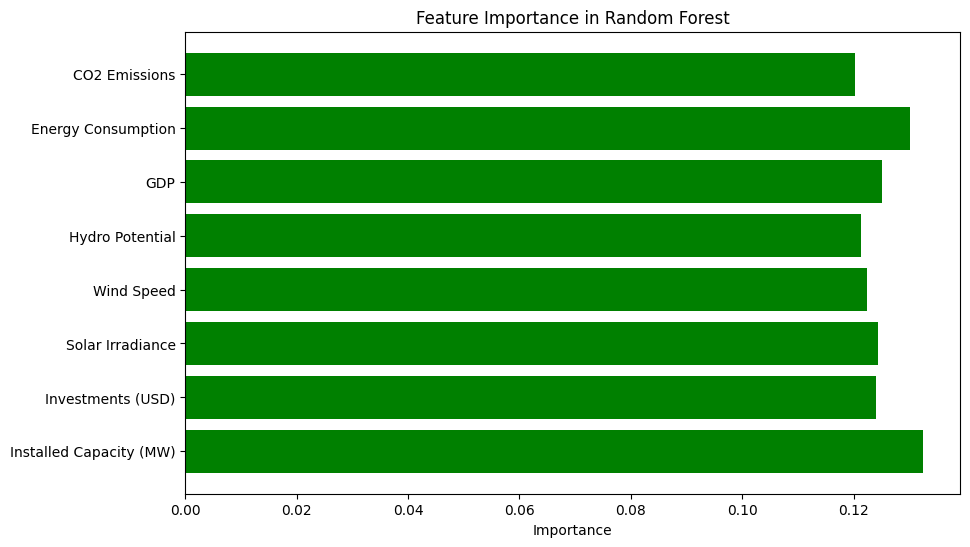

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance
importances = rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10,6))
plt.barh(features, importances, color="green")
plt.xlabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

R^2 is -0.09095045610060337
 Adj R^2 is -0.030664857407850743
 MSE is: 888655218.2651731
 RMSE is: 29810.320666929652


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


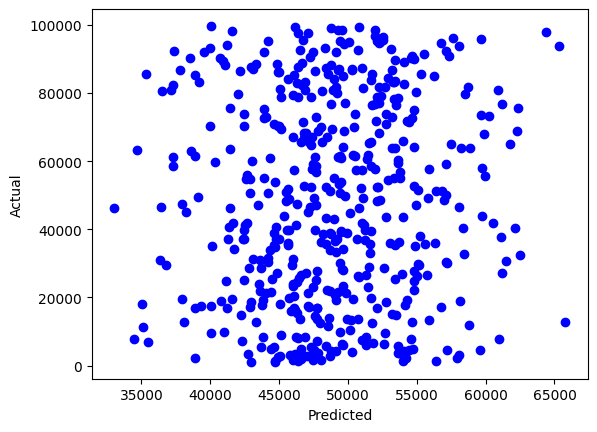

In [ ]:
rf_model = predict(RandomForestRegressor(n_estimators=100, random_state=42), X, y)

### **Comparison Between models.**

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=0)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = [rmse, mae, r2]

results_data = pd.DataFrame(results, index=["RMSE", "MAE", "R²"]).T

print(" Model Comparison Results:")
print(results_data)

 Model Comparison Results:
                           RMSE           MAE        R²
Linear Regression  28505.401295  24611.272611 -0.001069
Decision Tree      38587.786223  30877.203831 -0.834464
Random Forest      28943.791146  24998.066682 -0.032097


# **Conclusion**

This project analyzed a renewable energy dataset through Exploratory Data Analysis (EDA), Regression modeling, and Forecasting. EDA revealed key relationships, showing that factors like installed capacity, investments, solar irradiance, and wind speed strongly influence energy production. Regression techniques (Linear Regression, Decision Tree, Random Forest) were applied, with Random Forest giving the most accurate predictions. Forecasting methods highlighted the future growth trends in renewable energy production, useful for long-term planning. Mapping and visualization provided geographical insights into production distribution across countries. Overall, the project demonstrates how data-driven approaches can support energy policy, optimize investments, and guide sustainable energy planning.